In [4]:
from google.colab import files
uploaded = files.upload()


Saving Fake News Detection Dataset.csv to Fake News Detection Dataset (1).csv


In [9]:
import pandas as pd

df = pd.read_csv("Fake News Detection Dataset.csv")
print(df.head())

     ID  Word_Count  Number_of_Sentence  Unique_Words  Average_Word_Length  \
0  1606          10                   4            24             6.176750   
1  3718          10                   8            25             5.826770   
2  2634          10                   7            18             4.619040   
3  5560          10                   6            18             4.961424   
4  7494          10                   4            21             4.114324   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1  


In [12]:
df.head()
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


In [7]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 ID                     0
Word_Count             0
Number_of_Sentence     0
Unique_Words           0
Average_Word_Length    0
Label                  0
dtype: int64
Duplicate rows: 0


<ipython-input-17-52356e973e37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='viridis')


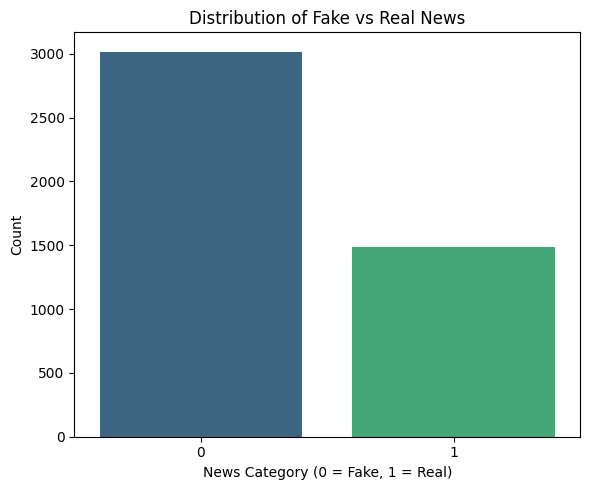

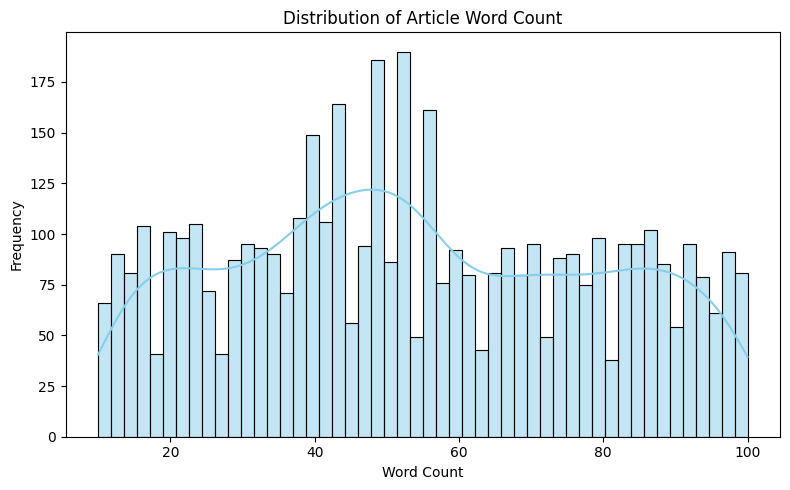

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Fake vs Real news
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=df, palette='viridis')
plt.title("Distribution of Fake vs Real News")
plt.xlabel('News Category (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Use 'Word_Count' to represent text length
plt.figure(figsize=(8, 5))
sns.histplot(df['Word_Count'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Article Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [19]:
# Set target and features
target = 'Label'  # 0 = Fake, 1 = Real
features = ['Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length']

X = df[features]
y = df[target]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
features = ['Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length']
target = 'Label'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.85      0.75       595
           1       0.43      0.23      0.30       305

    accuracy                           0.64       900
   macro avg       0.55      0.54      0.53       900
weighted avg       0.60      0.64      0.60       900



In [23]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6355555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.75       595
           1       0.43      0.23      0.30       305

    accuracy                           0.64       900
   macro avg       0.55      0.54      0.53       900
weighted avg       0.60      0.64      0.60       900



In [27]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


              precision    recall  f1-score   support

        Fake       0.68      0.85      0.75       595
        Real       0.43      0.23      0.30       305

    accuracy                           0.64       900
   macro avg       0.55      0.54      0.53       900
weighted avg       0.60      0.64      0.60       900



In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suppose this is the new data (update values as needed)
new_article = {
    'Word_Count': 100,
    'Number_of_Sentence': 10,
    'Unique_Words': 90,
    'Average_Word_Length': 4.8
}

# Convert to DataFrame
new_df = pd.DataFrame([new_article])

# Optional: Scale if your model used scaling
features = ['Word_Count', 'Number_of_Sentence', 'Unique_Words', 'Average_Word_Length']
scaler = StandardScaler()

# Fit scaler on original data
scaler.fit(df[features])

# Transform the new input
new_input_scaled = scaler.transform(new_df[features])

# Now you can use it for prediction
# Example: prediction = model.predict(new_input_scaled)


In [33]:
# Predict label for the new article (0 = Fake, 1 = Real)
predicted_label = model.predict(new_input_scaled)

# Interpret prediction
label_text = "Real News" if predicted_label[0] == 1 else "Fake News"
print("📰 Predicted News Category:", label_text)


📰 Predicted News Category: Real News


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
 !pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00


In [35]:
import gradio as gr

def predict_news_category(word_count, num_sentences, unique_words, avg_word_length):
    # Prepare input
    input_data = {
        'Word_Count': word_count,
        'Number_of_Sentence': num_sentences,
        'Unique_Words': unique_words,
        'Average_Word_Length': avg_word_length
    }
    input_df = pd.DataFrame([input_data])

    # Optional: scale if needed
    scaled_input = scaler.transform(input_df)

    # Predict
    prediction = model.predict(scaled_input)[0]
    label_text = "Real News" if prediction == 1 else "Fake News"

    return f"📰 Predicted Category: {label_text}"
interface = gr.Interface(
    fn=predict_news_category,
    inputs=[
        gr.Number(label="Word Count"),
        gr.Number(label="Number of Sentences"),
        gr.Number(label="Unique Words"),
        gr.Number(label="Average Word Length"),
    ],
    outputs="text",
    title="Fake News Detector",
    description="Enter article statistics to predict whether the news is real or fake."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b5262e5d38e139d90.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
